# Computer Vision

It is an AI field enabling computers to "see," interpret, and understand visual information (images, videos) like humans do, using deep learning to identify objects, recognize patterns, and extract meaningful insights to perform actions.

It mimics human sight by processing pixels, detecting features (edges, shapes), and building up complex understanding through neural networks trained on massive datasets.


## 0. Computer Vision libraries in PyTorch

* `torchvision` - base library for computer vision
* `torchvision.datasets` - get datasets and data loading functions
* `torchvision.models` - get pretrained computer vision models thaat can be leveraged for own problems
* `torchvision.transforms` - functions for manipulating vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class
* `torch.utils.data.DataLoader` - creates Python iterable over a dataset

In [261]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.1+cu130
0.24.1+cu130


## 1. Getting a dataset

Dataset used: Fashion-MNIST

In [262]:
# Set up training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None # how to transform labels/target
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None # how to transform labels/target
)

In [263]:
len(train_data), len(test_data)

(60000, 10000)

In [264]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [265]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [266]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [267]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [268]:
image.shape, train_data.classes[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

### 1.2 Visualizing the data

Text(0.5, 1.0, 'Ankle boot')

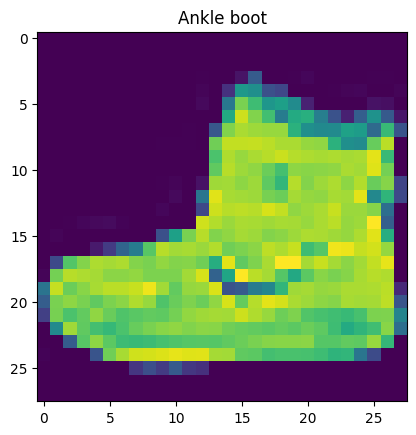

In [269]:
image, label = train_data[0]
plt.imshow(torch.permute(image, dims=(1, 2, 0)))
# since image is grayscale, image.squeeze() would also work
plt.title(train_data.classes[label])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

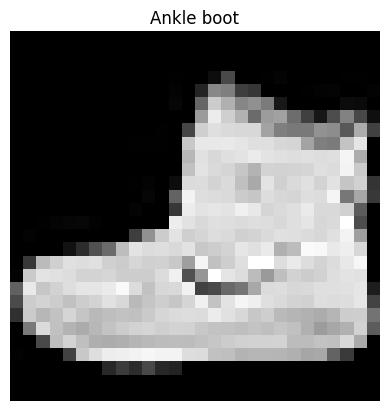

In [270]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(train_data.classes[label])
plt.axis(False)

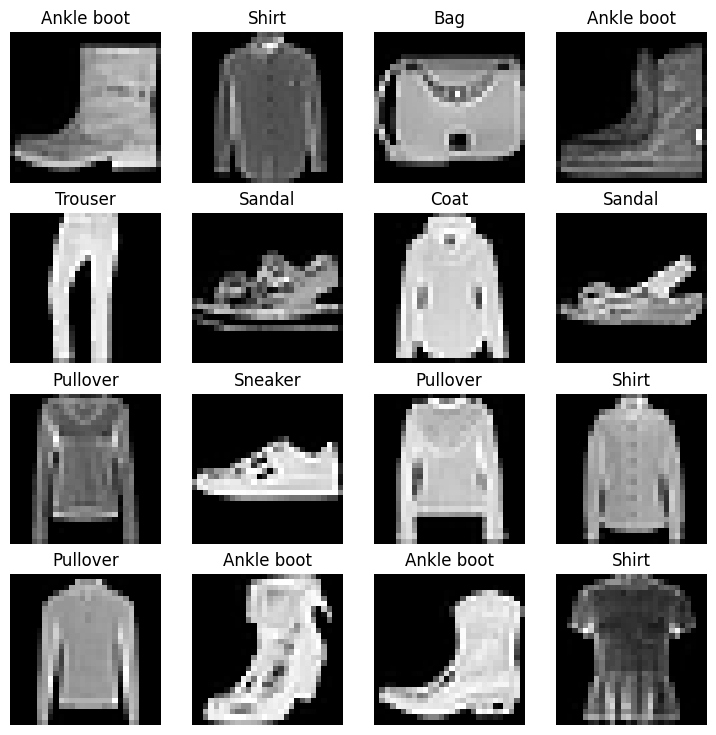

In [271]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    plt.subplot(rows, cols, i) # or fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(train_data.classes[label])
    plt.axis(False)

## 2. Prepare DataLoader

Currently, data is a PyTorch Dataset. It converts the data into a Python iterable.

Data has to be turned into (mini) batches. It may not be possible to stores tens of thousands of data at one time in the RAM, so break it up into smaller batches. It also gives the NN more chances to update its gradients per epoch.

In [272]:
from torch.utils.data import DataLoader

# Set up batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into dataloader
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False) # test data can be set to False, since model does not see test data during training

print(f"DataLoaders: {train_dataloader, test_dataloader}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002DAB2E4C2D0>, <torch.utils.data.dataloader.DataLoader object at 0x000002DA9DEB4690>)


In [273]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [274]:
# Check contents of train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_features_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32, 1, 28, 28]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


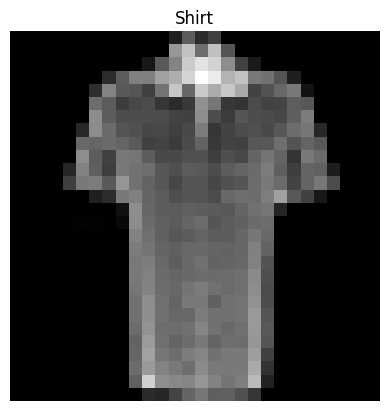

In [275]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0, the baseline

Best practice to start with a baseline model, which then will be improved upon with subsequent models/experiements -> start simply, and add complexity when necessary

In [276]:
# Create flatten layer - flattening a contiguous range of dims into a tensor
flatten_model = nn.Flatten()

# Get single sample
x = train_features_batch[0]

# Flatten sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [277]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [278]:
torch.manual_seed(42)

# Set up model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # 28 * 28
                              output_shape=len(class_names),
                              hidden_units=10
                            ).to("cpu")

model_0, model_0.state_dict()

(FashionMNISTModelV0(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 OrderedDict([('layer_stack.1.weight',
               tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                       [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                       [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                       ...,
                       [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                       [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                       [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
              ('layer_stack.1.bias',
               tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                        0.0018,  0.0163])),
              ('l

In [279]:
model_0.eval()
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Set up loss, optimizer, and evaluation metrics

* `nn.CrossEntropyLoss()` because multi-class data
* `torch.optim.SGD()`
* Accuracy can be our evaluation metric

In [280]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

from torchmetrics import Accuracy
# from pathlib import Path
# import requests

acc_fn = Accuracy(task='multiclass', num_classes=len(class_names))

# if Path("helper_functions.py").is_file():
#     print("helper_functions.py already exists, skipping download")
# else:
#     print("Downloading helper_functions.py")
#     request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
#     with open("helper_functions.py", "wb") as f:
#         f.write(request.content)

### 3.2 Creating a function to time the experiments

Two of the main things to track:

* Model performance (loss, accuracy, etc.)
* How fast it runs

In [281]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    '''Prints difference between start and end time'''
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [282]:
start_time = timer()
# ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


2.4699955247342587e-05

### 3.3 Creating a training loop and training on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the training loss **per batch**.
3. Loop through testing batches, perform testing steps, calculate the testing loss **per batch**.

In [283]:
# import tqdm for progress bar
%pip install tqdm

from tqdm.auto import tqdm

Note: you may need to restart the kernel to use updated packages.


In [284]:
# Set seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set number of epochs (small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    ### Training
    train_loss = 0

    # Add a loop to loop through the training batch
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # Forward pass
        y_pred = model_0(X)

        # Loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate training loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    
    # Divide total training loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward pass
            test_pred = model_0(X_test)

            # Loss
            test_loss += loss_fn(test_pred, y_test)

            # Accuracy
            test_acc += acc_fn(test_pred.argmax(dim=1), y_test)

        # Calculate avg. test loss per batch
        test_loss /= len(test_dataloader)

        # Calculate test accuracy avg. per batch
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


# Calculate training time
train_time_end_on_cpu = timer()
time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:04<00:08,  4.47s/it]


Train loss: 0.5904 | Test loss: 0.5095, Test acc: 0.8204
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:08<00:04,  4.42s/it]


Train loss: 0.4763 | Test loss: 0.4799, Test acc: 0.8320
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:13<00:00,  4.40s/it]


Train loss: 0.4550 | Test loss: 0.4766, Test acc: 0.8343
Train time on cpu: 13.215 seconds


## 4. Make precdictions and get Model 0 results

In [285]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: Accuracy):
    '''Returns a dictionary containing the results of the model predicting on data_loader.'''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += acc_fn(y_pred.argmax(dim=1), y)

        # Scale the loss and acc to find the average per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # works only if model was created from a class
        "model_loss": loss.item(),
        "model_acc": acc.item()}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, acc_fn=acc_fn)

model_0_results

100%|██████████| 313/313 [00:00<00:00, 532.23it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8342651724815369}

## 5. Set up device agnostic code

In [286]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## 6. Model 1, a better model with non-linearity

### 6.1 New model

In [287]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, X: torch.Tensor):
        return self.layer_stack(X)

In [288]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device=device)
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

In [289]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

acc_fn = Accuracy(task='multiclass', num_classes=len(class_names))

### 6.2 Functionizing train and eval loops 

In [290]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn: Accuracy,
               device: torch.device = device):
    '''Performs training with model trying to learn on data_loader'''
    train_loss, train_acc = 0, 0

    model.train()

    acc_fn = acc_fn.to(device)

    # Add a loop to loop through the training batch
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate training loss

        train_acc += acc_fn(y_pred.argmax(dim=1), y)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    
    # Divide total training loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")

In [291]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: Accuracy,
               device: torch.device = device):
    '''Performs testing with model going over data_loader'''
    test_loss, test_acc = 0, 0
    
    model.eval()

    acc_fn = acc_fn.to(device)

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred = model(X)

            # Loss
            test_loss += loss_fn(test_pred, y)

            # Accuracy
            test_acc += acc_fn(test_pred.argmax(dim=1), y)

        # Calculate avg. test loss per batch
        test_loss /= len(data_loader)

        # Calculate test accuracy avg. per batch
        test_acc /= len(data_loader)

        print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.5f}")

In [292]:
torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    train_step(model_1, train_dataloader, loss_fn, optimizer, acc_fn, device)
    test_step(model_1, train_dataloader, loss_fn, acc_fn, device)

train_time_end_on_gpu = timer()

time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 1.09199 | Train acc: 0.61343


 33%|███▎      | 1/3 [00:12<00:25, 12.91s/it]

Test loss: 0.92727, Test acc: 0.66005
Epoch: 1
------
Train loss: 0.73779 | Train acc: 0.73693


 67%|██████▋   | 2/3 [00:24<00:12, 12.34s/it]

Test loss: 0.68793, Test acc: 0.75427
Epoch: 2
------
Train loss: 0.66776 | Train acc: 0.76077


100%|██████████| 3/3 [00:36<00:00, 12.03s/it]

Test loss: 0.64329, Test acc: 0.76872
Train time on cuda: 36.104 seconds


**Note:** Training time on CPU can be faster than training time on GPU depending on data or hardware.

Why could this be?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU
2. The hardware being used has a better CPU in terms of compute capability than the GPU

In our case, why is GPU slower?

1. **Data transfer cost:** Each batch must be transferred X.to(device), y.to(device) — this PCIe transfer overhead (~microseconds per batch) outweighs the tiny computation savings with only 10 hidden units.
2. **Kernel launch overhead:** GPU kernels have per-operation launch cost. With a tiny model (784→10→10), the overhead to launch kernels on GPU is large relative to the actual compute time.
3. **Small batch size (32):** GPUs are designed to parallelize thousands of operations. A batch of 32 images doesn't provide enough parallelism to justify the overhead.
4. **CPU efficiency:** A simple linear model with 10 hidden units is actually well-suited to CPU — it fits in cache and CPU avoids kernel launch overhead.

GPUs become faster when we have:

1. Large models (millions of parameters)
2. Large batch sizes (128+, ideally 256–1024+)
3. Deep networks with many operations per batch

In [293]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: Accuracy,
               device: torch.device = device):
    '''Returns a dictionary containing the results of the model predicting on data_loader.'''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += acc_fn(y_pred.argmax(dim=1), y)

        # Scale the loss and acc to find the average per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # works only if model was created from a class
        "model_loss": loss.item(),
        "model_acc": acc.item()}

In [294]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, acc_fn=acc_fn, device=device)

model_1_results

100%|██████████| 313/313 [00:00<00:00, 335.01it/s]


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6874350309371948,
 'model_acc': 0.7565894722938538}

## 7. Model 2, Convolutional Neural Network

Aka ConvNets. Known for their capabilities to **find patterns in visual data**.

In [295]:
class FashionMNISTModelV2(nn.Module):
    '''Model arch that replicates the TinyVGG model from CNN explainer website'''
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()

        # first two layers -> feature extraction layers
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                      kernel_size=3, # or (3, 3) -> size of the window to analyze
                      stride=1, # size of a step over the pixels
                      padding=1), # Padding conserves data at the borders of activation maps, which leads to better performance, and it can help preserve the input's spatial size
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # kernel_size the window to take the max over
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        # last layer -> classifier layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, X):
        X = self.conv_block_1(X)
        # print(f"Output shape of Conv block 1 {X.shape}")
        X = self.conv_block_2(X)
        # print(f"Output shape of Conv block 2 {X.shape}")
        X = self.classifier(X)
        # print(f"Output shape of Classifier {X.shape}")
        return X

In [357]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # number of color channels
                              output_shape=len(class_names),
                              hidden_units=64).to(device)

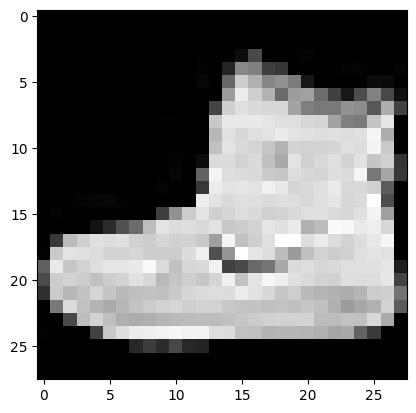

In [358]:
plt.imshow(image.squeeze(), cmap='gray')

In [359]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [360]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[-0.0098, -0.0218,  0.0137,  0.0146,  0.0285,  0.0176, -0.0168, -0.0015,
         -0.0949,  0.0559]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [361]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [362]:
test_image.shape

torch.Size([3, 64, 64])

In [363]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)

# pass the data through the conv2d layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

**Note:**
$$Output\_Size = \frac{(Input\_Size - Kernel\_Size + 2 * Padding)}{Stride} + 1$$

### 7.2 Stepping through `nn.MaxPool2d()`

In [364]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)
maxpool_output = maxpool_layer(conv_output)
maxpool_output.shape

torch.Size([10, 31, 31])

**Note:**

$$Output\_Size = \left \lfloor{\frac{Input\_Size+2*Padding}{Kernel\_Size}}\right \rfloor $$

### 7.3 Set up a loss function and optimizer for `model_2`

In [365]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and testing `model_2` with train and test functions

In [366]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 3

start = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------")
    train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, acc_fn=acc_fn, device=device)
    test_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, acc_fn=acc_fn, device=device)

end = timer()
time_model_2 = print_train_time(start=start, end=end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.49543 | Train acc: 0.82108


 33%|███▎      | 1/3 [00:13<00:26, 13.45s/it]

Test loss: 0.30843, Test acc: 0.89107
Epoch: 1
-----------
Train loss: 0.29630 | Train acc: 0.89342


 67%|██████▋   | 2/3 [00:25<00:12, 12.80s/it]

Test loss: 0.29929, Test acc: 0.89340
Epoch: 2
-----------
Train loss: 0.25379 | Train acc: 0.90872


100%|██████████| 3/3 [00:37<00:00, 12.53s/it]

Test loss: 0.23060, Test acc: 0.91758
Train time on None: 37.598 seconds


In [367]:
# Get model_2 results
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, acc_fn=acc_fn, device=device)
model_2_results

100%|██████████| 313/313 [00:00<00:00, 358.60it/s]


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.26654544472694397,
 'model_acc': 0.9039536714553833}

## 8. Compare results and training time

In [368]:
import pandas as pd

results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,0.834265
1,FashionMNISTModelV1,0.687435,0.756589
2,FashionMNISTModelV2,0.266545,0.903954


In [369]:
# Add training time to results comparison
results['training_time'] = [time_model_0, time_model_1, time_model_2]
results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,0.834265,13.214976
1,FashionMNISTModelV1,0.687435,0.756589,36.104267
2,FashionMNISTModelV2,0.266545,0.903954,37.597728


Text(0, 0.5, 'model')

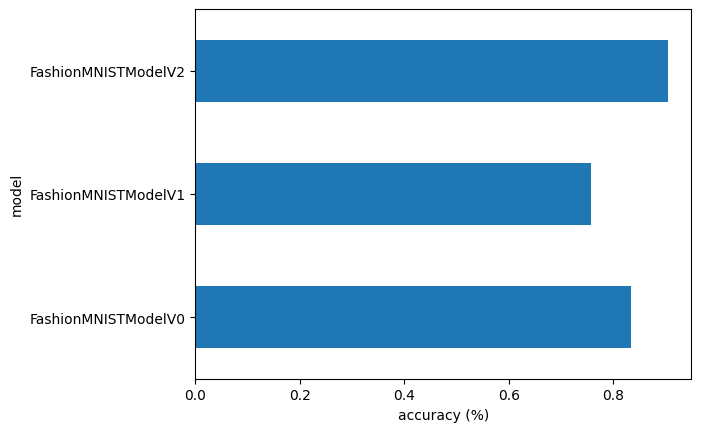

In [370]:
# Visualize the model results
results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [371]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the sample. Unsqueeze to add the batch size dimension since it is a single image
            sample = torch.unsqueeze(sample, dim=0).to(device)\
            
            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Move pred_prob to cpu for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn the list into a tensor
    return torch.stack(pred_probs)


In [372]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [373]:
img, label = test_data[0][:10]

In [374]:
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [390]:
import random

# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

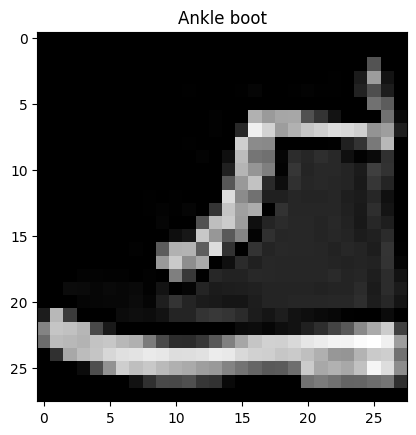

In [391]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [392]:
# Make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# view first 2 prediction probabilities
pred_probs[:2]

tensor([[2.2225e-04, 3.6721e-06, 2.9998e-05, 3.1180e-04, 1.1722e-05, 4.6631e-02,
         1.0001e-04, 3.3949e-02, 7.4998e-03, 9.1124e-01],
        [1.6016e-05, 6.5569e-08, 2.4667e-06, 1.8374e-06, 2.6203e-07, 6.2815e-05,
         1.6487e-06, 9.9550e-01, 1.4888e-04, 4.2685e-03]])

In [394]:
# Convert prediction probabilities into labels
pred_labels = [class_names[idx.item()] for idx in pred_probs.argmax(dim=1)]
pred_labels[:2]

['Ankle boot', 'Sneaker']

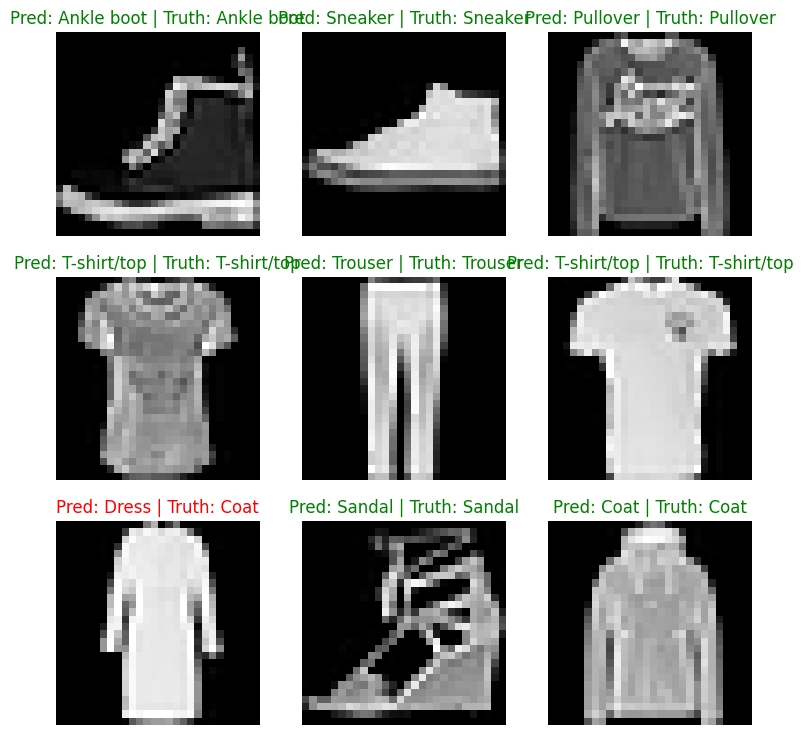

In [395]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows, ncols = 3, 3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap='gray')

    pred_label = pred_labels[i]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, c='g')
    else:
        plt.title(title_text, c='r')

    plt.axis(False)

## 10. Making a Confusion Matrix for further evaluation

Great way to evaluate classification models visually

1. Make predictions
2. Make confusion matrix using `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [402]:
%pip install mlxtend
%pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [401]:
# 1. Make predictions with model
y_preds = []

model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        X, y = X.to(device), y.to(device)

        y_logit = model_2(X)

        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...: 100%|██████████| 313/313 [00:00<00:00, 444.45it/s]


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [403]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [404]:
assert int(mlxtend.__version__.split(".")[1]) >= 23, 'mlxtend version should be 0.23.0 or higher'

In [405]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

### 10.1 Creating the Confusion matrix

In [406]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Set up confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
confmat_tensor

tensor([[698,   4,  23,  55,  13,   0, 204,   0,   3,   0],
        [  7, 908,   0,  64,  17,   0,   3,   0,   1,   0],
        [ 17,   4, 786,  15, 108,   0,  65,   0,   5,   0],
        [ 16,  12,  21, 894,  31,   0,  21,   0,   4,   1],
        [  5,   5,  65,  42, 825,   0,  49,   0,   9,   0],
        [  8,   2,   1,   4,   1, 817,  10,  58,  70,  29],
        [ 76,   6,  85,  47, 129,   0, 647,   0,  10,   0],
        [  0,   1,   0,   0,   0,  21,   0, 930,  11,  37],
        [  8,   3,   4,  11,  14,   4,  18,   5, 932,   1],
        [  1,   0,   0,   3,   4,  15,   7,  78,  25, 867]])

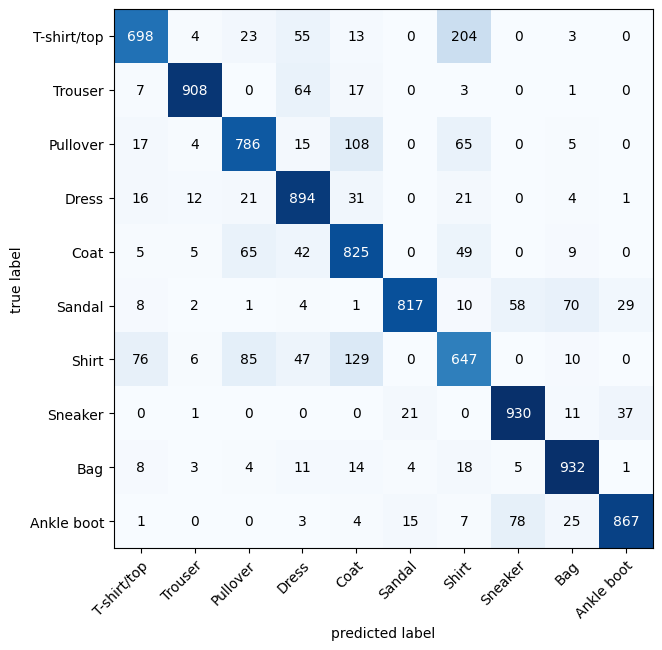

In [407]:
# Plot the confusion matrix
fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)